Classification Model Development(Individual Assignment 2)
Case: Apprentice Chef

# Dataset

In [1]:
########################################
# importing libraries
########################################
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
import random as rand # random number generation
import gender_guesser.detector as gender # guess gender based on (given) name
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning


# CART model packages
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects


# new packages
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# specifying file name
file = './datasets/Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
chef = pd.read_excel(file)

chef.head(10)

REVENUE  CROSS_SELL_SUCCESS               NAME                            EMAIL FIRST_NAME FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED
0   393.00                   1            Saathos         saathos@unitedhealth.com    Saathos     Saathos                   14                   6                           12                         10                    48.00              1                          3                         1                       1          5              2            0                 0                2               0                    0               33.4                   1                        0                   1                    17                    0
1  1365.00                   1    Alysanne Osgrey           alysanne.osgrey@ge.org   Alysanne      Osgrey                   87                   3                            8                          8                    40.35              1                          0                         0                       1          5              1           12                 0                2               0                    0               84.8                   1                        0                   3                    13                  170
2   800.00                   1     Edwyd Fossoway           edwyd.fossoway@jnj.com      Edwyd    Fossoway                   15                   7                           11                          5                    19.77              1                          3                         0                       1          6              1            1                 0                1               0                    0               63.0                   1                        0                   2                    16                    0
3   600.00                   1  Eleyna Westerling         eleyna.westerling@ge.org     Eleyna  Westerling                   13                   6                           11                          5                    90.00              1                          2                         0                       1          6              1           14                 0                3               0                    0               43.8                   1                        0                   2                    14                    0
4  1490.00                   1      Elyn Norridge            elyn.norridge@jnj.com       Elyn    Norridge                   47                   8                            6                         10                    40.38              1                          0                         0                       0          5              1            5                 0                8               0                    0               84.8                   1                        1                   3                    12                  205
5  1550.00                   1    Genna Lannister   genna.lannister@protonmail.com      Genna   Lannister                   36                   2                            9                          1                   190.18              1                          4                         0                       1          4              1            0                 0                3               1                    0               78.8                   1                        1                   3                    12                    0
6  1430.00                   1       Olene Tyrell       olene.tyrell@mcdonalds.com      Olene    

In [2]:
print(chef.columns)

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')


In [3]:
chef.isnull().sum(axis = 0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [4]:
chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

In [5]:
# using .shape to view (ROWS, COLUMNS)
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {chef.shape[0]}
Features:     {chef.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



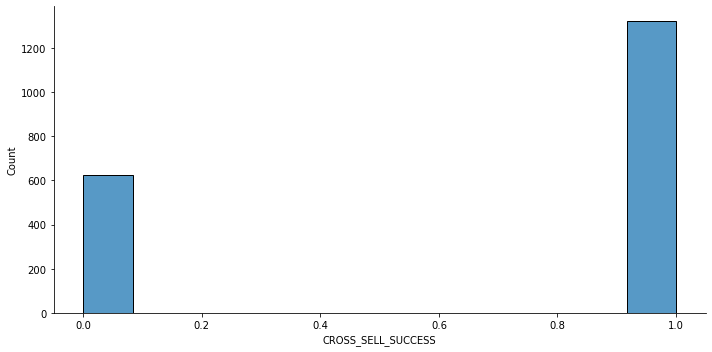

In [6]:
# developing a histogram using DISPLOT #distplot
sns.displot(data   = chef,
            x      = 'CROSS_SELL_SUCCESS',
            height = 5,
            aspect = 2)

# displaying the histogram
plt.show()

In [7]:
chef.describe(include = 'number').round(decimals = 2)

REVENUE  CROSS_SELL_SUCCESS  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED
count  1946.00             1946.00              1946.00              1946.0                      1946.00                    1946.00                  1946.00        1946.00                    1946.00                   1946.00                 1946.00    1946.00        1946.00      1946.00           1946.00          1946.00         1946.00              1946.00            1946.00             1946.00                  1946.00             1946.00               1946.00              1946.00
mean   2107.29                0.68                74.63                 4.9                         6.98                       5.38                    99.60           0.88                       1.40                      0.17                    0.71       5.52           1.48        11.33              1.49             2.97            0.36                 0.11             150.56                4.44                     0.60                2.79                 13.51               106.43
std    1138.29                0.47                55.31                 2.5                         2.28                       3.04                    62.34           0.33                       1.55                      0.43                    0.45       0.58           0.53        13.57              2.32             2.74            0.48                 0.32              49.45                1.55                     0.64                0.76                  2.33               181.01
min     131.00                0.00                11.00                 1.0                         1.00                       1.00                    10.33           0.00                       0.00                      0.00                    0.00       4.00           0.00         0.00              0.00             0.00            0.00                 0.00              33.40                1.00                     0.00                1.00                  5.00                 0.00
25%    1350.00                0.00                39.00                 3.0                         5.00                       3.00                    72.00           1.00                       0.00                      0.00                    0.00       5.00           1.00         1.00              0.00             1.00            0.00                 0.00             114.40                3.00                     0.00                2.00                 12.00                 0.00
50%    1740.00                1.00                60.00                 5.0                         7.00                       5.00                    94.16           1.00                       1.00                      0.00                    1.00       6.00           1.00         7.00              0.00             2.00            0.00                 0.00             145.60                4.00                     1.00                3.00                 13.00                 0.00
75%    2670.00                1.00                95.00                 7.0                         8.00                       8.00                   117.29           1.00                       2.00                      0.00                    1.00       6.00           2.00        13.00              3.00             4.00            1.00                 0.00             173.78                5.00                     1.00                3.00                 15.00               174.00
max    8793.75                1.00               493.00                19.0                        18.00       

In [ ]:
# CONTINUOUS 連續數字
# ----------
# REVENUE (Y-variable)
# AVG_TIME_PER_SITE_VISIT
# AVG_PREP_VID_TIME
# MEDIAN_MEAL_RATING
# AVG_CLICKS_PER_VISIT
# TOTAL_PHOTOS_VIEWED


# INTERVAL/COUNT 計數
# --------------
# TOTAL_MEALS_ORDERED
# UNIQUE_MEALS_PURCH
# CONTACTS_W_CUSTOMER_SERVICE
# PRODUCT_CATEGORIES_VIEWED
# CANCELLATIONS_BEFORE_NOON
# CANCELLATIONS_AFTER_NOON
# PC_LOGINS
# MOBILE_LOGINS
# WEEKLY_PLAN
# EARLY_DELIVERIES
# LATE_DELIVERIES
# LARGEST_ORDER_SIZE
# MASTER_CLASSES_ATTENDED
# MEDIAN_MEAL_RATING
# AVG_CLICKS_PER_VISIT
# TOTAL_PHOTOS_VIEWED

# CATEGORICAL 類別
# -----------
# CROSS_SELL_SUCCESS
# MOBILE_NUMBER
# TASTES_AND_PREFERENCES
# PACKAGE_LOCKER
# REFRIGERATED_LOCKER



In [8]:
# declaring explanatory variables that will be used
original_var = ['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME',
                'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
                'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
                'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
                'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
                'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
                'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',
                'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
                'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']
              

continous_var = ['REVENUE','AVG_PREP_VID_TIME','AVG_CLICKS_PER_VISIT']

count_var = ['TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
            'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
            'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_BEFORE_NOON',
            'CANCELLATIONS_AFTER_NOON',  'PC_LOGINS',
            'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
            'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
            'TOTAL_PHOTOS_VIEWED']

categorical_var = ['MOBILE_NUMBER', 'TASTES_AND_PREFERENCES', 'PACKAGE_LOCKER',
                  'REFRIGERATED_LOCKER']

# grouping variables based on types
con_var_data = chef.loc[ : , continous_var]
count_var_data = chef.loc[ : , count_var]
cate_var_data = chef.loc[ : , categorical_var]

# declaring explanatory variables
exp_data = chef.loc[ : , original_var]

# declaring response variables
res_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']

#  Engineering count variables

In [27]:
# create new variable 
chef['total_cancellations'] = (chef['CANCELLATIONS_BEFORE_NOON'] + chef['CANCELLATIONS_AFTER_NOON'])
chef['cancellation_rate'] = (chef['CANCELLATIONS_BEFORE_NOON'] + chef['CANCELLATIONS_AFTER_NOON'])/ chef['TOTAL_MEALS_ORDERED']
chef['complain_rate'] = chef['CONTACTS_W_CUSTOMER_SERVICE'] / chef['TOTAL_MEALS_ORDERED']

# create new variable name to the list
count_var.append('total_cancellations')
count_var.append('cancellation_rate')
count_var.append('complain_rate')

# checking result
chef.loc[ : , ['total_cancellations','cancellation_rate','complain_rate']].head()


total_cancellations  cancellation_rate  complain_rate
0                    4           0.285714       0.857143
1                    0           0.000000       0.091954
2                    3           0.200000       0.733333
3                    2           0.153846       0.846154
4                    0           0.000000       0.127660

In [10]:
chef.head(10)

REVENUE  CROSS_SELL_SUCCESS               NAME                            EMAIL FIRST_NAME FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  total_cancellations  cancellation_rate  complain_rate
0   393.00                   1            Saathos         saathos@unitedhealth.com    Saathos     Saathos                   14                   6                           12                         10                    48.00              1                          3                         1                       1          5              2            0                 0                2               0                    0               33.4                   1                        0                   1                    17                    0                    4           0.285714       0.857143
1  1365.00                   1    Alysanne Osgrey           alysanne.osgrey@ge.org   Alysanne      Osgrey                   87                   3                            8                          8                    40.35              1                          0                         0                       1          5              1           12                 0                2               0                    0               84.8                   1                        0                   3                    13                  170                    0           0.000000       0.091954
2   800.00                   1     Edwyd Fossoway           edwyd.fossoway@jnj.com      Edwyd    Fossoway                   15                   7                           11                          5                    19.77              1                          3                         0                       1          6              1            1                 0                1               0                    0               63.0                   1                        0                   2                    16                    0                    3           0.200000       0.733333
3   600.00                   1  Eleyna Westerling         eleyna.westerling@ge.org     Eleyna  Westerling                   13                   6                           11                          5                    90.00              1                          2                         0                       1          6              1           14                 0                3               0                    0               43.8                   1                        0                   2                    14                    0                    2           0.153846       0.846154
4  1490.00                   1      Elyn Norridge            elyn.norridge@jnj.com       Elyn    Norridge                   47                   8                            6                         10                    40.38              1                          0                         0                       0          5              1            5                 0                8               0                    0               84.8                   1                        1                   3                    12                  205                    0           0.000000       0.127660
5  1550.00                   1    Genna Lannister   genna.lannister@protonmail.com      Genna   Lannister                   36                   2                            9                          1                   190.18              1                          4                         0                       1      

#  Engineering CATEGORICAL variables

- MOBILE_NUMBER
- TASTES_AND_PREFERENCES
- PACKAGE_LOCKER
- REFRIGERATED_LOCKER

In [11]:
# 計算每個欄位裡的資料個數
# printing columns
print(f"""
CROSS_SELL_SUCCESS
------
{chef['CROSS_SELL_SUCCESS'].value_counts()}


MOBILE_NUMBER
----------
{chef['MOBILE_NUMBER'].value_counts()}


TASTES_AND_PREFERENCES
-------------
{chef['TASTES_AND_PREFERENCES'].value_counts()}

PACKAGE_LOCKER
-------------
{chef['PACKAGE_LOCKER'].value_counts()}

REFRIGERATED_LOCKER
-------------
{chef['REFRIGERATED_LOCKER'].value_counts()}
""")


CROSS_SELL_SUCCESS
------
1    1321
0     625
Name: CROSS_SELL_SUCCESS, dtype: int64


MOBILE_NUMBER
----------
1    1708
0     238
Name: MOBILE_NUMBER, dtype: int64


TASTES_AND_PREFERENCES
-------------
1    1390
0     556
Name: TASTES_AND_PREFERENCES, dtype: int64

PACKAGE_LOCKER
-------------
0    1255
1     691
Name: PACKAGE_LOCKER, dtype: int64

REFRIGERATED_LOCKER
-------------
0    1726
1     220
Name: REFRIGERATED_LOCKER, dtype: int64



In [35]:
# MOBILE_NUMBER
# create new columns for dummy variable
chef['MOBILE_NUMBER_user'] = 0

# for loop to subsetting the threshold for this variable
for index, value in chef.iterrows():
    if chef.loc[index,'MOBILE_NUMBER'] == 1 \
    and chef.loc[index,'MOBILE_LOGINS'] > 0 : chef.loc[index, 'MOBILE_NUMBER_user'] = 1

# check result
chef.loc[: ,'MOBILE_NUMBER_user'].value_counts()

1    1692
0     254
Name: MOBILE_NUMBER_user, dtype: int64

In [13]:
chef.head(5)

REVENUE  CROSS_SELL_SUCCESS               NAME                     EMAIL FIRST_NAME FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  total_cancellations  cancellation_rate  complain_rate  MOBILE_NUMBER_user
0    393.0                   1            Saathos  saathos@unitedhealth.com    Saathos     Saathos                   14                   6                           12                         10                    48.00              1                          3                         1                       1          5              2            0                 0                2               0                    0               33.4                   1                        0                   1                    17                    0                    4           0.285714       0.857143                   1
1   1365.0                   1    Alysanne Osgrey    alysanne.osgrey@ge.org   Alysanne      Osgrey                   87                   3                            8                          8                    40.35              1                          0                         0                       1          5              1           12                 0                2               0                    0               84.8                   1                        0                   3                    13                  170                    0           0.000000       0.091954                   1
2    800.0                   1     Edwyd Fossoway    edwyd.fossoway@jnj.com      Edwyd    Fossoway                   15                   7                           11                          5                    19.77              1                          3                         0                       1          6              1            1                 0                1               0                    0               63.0                   1                        0                   2                    16                    0                    3           0.200000       0.733333                   1
3    600.0                   1  Eleyna Westerling  eleyna.westerling@ge.org     Eleyna  Westerling                   13                   6                           11                          5                    90.00              1                          2                         0                       1          6              1           14                 0                3               0                    0               43.8                   1                        0                   2                    14                    0                    2           0.153846       0.846154                   1
4   1490.0                   1      Elyn Norridge     elyn.norridge@jnj.com       Elyn    Norridge                   47                   8                            6                         10                    40.38              1                          0                         0                       0          5              1            5                 0                8               0                    0               84.8                   1                        1                   3                    12                  205                    0           0.000000       0.127660                   1

#  Engineering String variables

- name
- email
- first_Name
- family_Name

In [14]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [28]:
# calling text_split_feature
text_split_feature(col = 'NAME',
                   df  = chef)


# checking results
chef['number_of_names'].value_counts().sort_index()

1     591
2    1201
3      98
4       9
5      35
6      12
Name: number_of_names, dtype: int64

In [16]:
chef.head(5)

REVENUE  CROSS_SELL_SUCCESS               NAME                     EMAIL FIRST_NAME FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  total_cancellations  cancellation_rate  complain_rate  MOBILE_NUMBER_user  number_of_names
0    393.0                   1            Saathos  saathos@unitedhealth.com    Saathos     Saathos                   14                   6                           12                         10                    48.00              1                          3                         1                       1          5              2            0                 0                2               0                    0               33.4                   1                        0                   1                    17                    0                    4           0.285714       0.857143                   1                1
1   1365.0                   1    Alysanne Osgrey    alysanne.osgrey@ge.org   Alysanne      Osgrey                   87                   3                            8                          8                    40.35              1                          0                         0                       1          5              1           12                 0                2               0                    0               84.8                   1                        0                   3                    13                  170                    0           0.000000       0.091954                   1                2
2    800.0                   1     Edwyd Fossoway    edwyd.fossoway@jnj.com      Edwyd    Fossoway                   15                   7                           11                          5                    19.77              1                          3                         0                       1          6              1            1                 0                1               0                    0               63.0                   1                        0                   2                    16                    0                    3           0.200000       0.733333                   1                2
3    600.0                   1  Eleyna Westerling  eleyna.westerling@ge.org     Eleyna  Westerling                   13                   6                           11                          5                    90.00              1                          2                         0                       1          6              1           14                 0                3               0                    0               43.8                   1                        0                   2                    14                    0                    2           0.153846       0.846154                   1                2
4   1490.0                   1      Elyn Norridge     elyn.norridge@jnj.com       Elyn    Norridge                   47                   8                            6                         10                    40.38              1                          0                         0                       0          5              1            5                 0                8               0                    0               84.8                   1                        1                   3                    12                  205                    0           0.000000       0.127660                   1                2

## Email : Engineering String Feature 

In [17]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # 儲存進新的list
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

0                 1
0               saathos  unitedhealth.com
1       alysanne.osgrey            ge.org
2        edwyd.fossoway           jnj.com
3     eleyna.westerling            ge.org
4         elyn.norridge           jnj.com
...                 ...               ...
1941         obara.sand         yahoo.com
1942  quentyn.blackwood         yahoo.com
1943       rhonda.rowan         gmail.com
1944             turnip         yahoo.com
1945     tommard.heddle         merck.com

[1946 rows x 2 columns]

In [18]:
# 存回去原本的儲存格
# STEP 2: concatenating with original DataFrame

# safety measure in case of multiple concatenations
chef = pd.read_excel(file)


# renaming column to concatenate 連環，連續
# 重新建立欄位名稱
email_df.columns = ['0' , 'email_domain']


# concatenating email_domain with chef_email DataFrame
chef = pd.concat([chef, email_df['email_domain']],
                   axis = 1)


# printing value counts of personal_email_domain
chef.loc[: ,'email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
cocacola.com         28
merck.com            28
jnj.com              28
mcdonalds.com        28
apple.com            27
nike.com             27
dupont.com           26
ge.org               26
ibm.com              26
chevron.com          25
microsoft.com        25
unitedhealth.com     24
exxon.com            24
travelers.com        24
boeing.com           23
mmm.com              22
caterpillar.com      22
pg.com               22
verizon.com          22
walmart.com          21
disney.com           21
visa.com             20
pfizer.com           20
jpmorgan.com         19
unitedtech.com       18
goldmansacs.com      18
cisco.com            18
homedepot.com        17
intel.com            17
Name: email_domain, dtype: int64

In [19]:
email_df

0      email_domain
0               saathos  unitedhealth.com
1       alysanne.osgrey            ge.org
2        edwyd.fossoway           jnj.com
3     eleyna.westerling            ge.org
4         elyn.norridge           jnj.com
...                 ...               ...
1941         obara.sand         yahoo.com
1942  quentyn.blackwood         yahoo.com
1943       rhonda.rowan         gmail.com
1944             turnip         yahoo.com
1945     tommard.heddle         merck.com

[1946 rows x 2 columns]

In [20]:
# email domain types
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com', '@boeing.com', 
                              '@caterpillar.com', '@chevron.com', '@cisco.com', 
                              '@cocacola.com', '@disney.com', '@dupont.com', 
                              '@exxon.com', '@ge.org', '@goldmansacs.com', 
                              '@homedepot.com', '@ibm.com', '@intel.com', 
                              '@jnj.com', '@jpmorgan.com', '@mcdonalds.com', 
                              '@merck.com', '@microsoft.com', '@nike.com', 
                              '@pfizer.com', '@pg.com', '@travelers.com', 
                              '@unitedtech.com', '@unitedhealth.com', 
                              '@verizon.com', '@visa.com', '@walmart.com']
personal_email_domains  = ['@gmail.com', '@yahoo.com','@protonmail.com']
junk_email_domains  = ['@me.com', '@aol.com', '@hotmail.com', 
                       '@live.com', '@msn.com', '@passport.com']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef['email_domain']:
        if '@' + domain in professional_email_domains:
            placeholder_lst.append(1)
            
        elif '@' + domain in personal_email_domains:
            placeholder_lst.append(1)
            
        else:
            placeholder_lst.append(0)

# ＃與原始DataFrame串聯
# concatenating with original DataFrame
chef['valid_email'] = pd.Series(placeholder_lst)


# checking results
chef['valid_email'].value_counts()

1    1557
0     389
Name: valid_email, dtype: int64

# User-Defined Functions

In [21]:
# Use 'reg' for regression (KNeighborsRegressor)
# Use 'class' for classification (KNeighborsClassifier)

In [22]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [23]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [24]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800, export = False):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    export     : bool, defalut False
        whether or not to export the tree as a .png file
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width,
                unconfined = True)


    return img


# Logistic Regression

In [36]:
# method
df_corr = chef.corr(method = 'pearson').round(decimals = 2)

# sort_values
df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)


CROSS_SELL_SUCCESS             1.00
valid_email                    0.28
CANCELLATIONS_BEFORE_NOON      0.16
number_of_names                0.16
total_cancellations            0.14
MOBILE_NUMBER_user             0.10
cancellation_rate              0.10
MOBILE_NUMBER                  0.10
TASTES_AND_PREFERENCES         0.08
REFRIGERATED_LOCKER            0.07
PC_LOGINS                      0.04
CONTACTS_W_CUSTOMER_SERVICE    0.04
MASTER_CLASSES_ATTENDED        0.04
PACKAGE_LOCKER                 0.04
MEDIAN_MEAL_RATING             0.03
AVG_PREP_VID_TIME              0.03
EARLY_DELIVERIES               0.02
LARGEST_ORDER_SIZE             0.02
LATE_DELIVERIES                0.01
AVG_TIME_PER_SITE_VISIT        0.01
TOTAL_PHOTOS_VIEWED            0.01
TOTAL_MEALS_ORDERED            0.01
PRODUCT_CATEGORIES_VIEWED      0.00
UNIQUE_MEALS_PURCH             0.00
REVENUE                        0.00
WEEKLY_PLAN                   -0.01
complain_rate                 -0.01
AVG_CLICKS_PER_VISIT        

In [37]:
# declaring explanatory variables
drop_col = ['CROSS_SELL_SUCCESS','NAME','FIRST_NAME', 'FAMILY_NAME',
            'EMAIL', 'email_domain']

chef_data = chef.drop(drop_col, axis = 1)


# declaring response variable
chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']

In [38]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# merging training data for statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)

In [39]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



In [40]:
for val in chef_data:
    print(f" {val} + ")

 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 valid_email + 
 total_cancellations + 
 cancellation_rate + 
 complain_rate + 
 number_of_names + 
 MOBILE_NUMBER_user + 


In [41]:
chef_train.head(10)

REVENUE  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  valid_email  total_cancellations  cancellation_rate  complain_rate  number_of_names  MOBILE_NUMBER_user  CROSS_SELL_SUCCESS
269    1256.0                   33                   4                            5                          8                    49.90              1                          0                         0                       1          6              2           14                 0                4               1                    0              107.9                   3                        1                   2                    18                    0            1                    0           0.000000       0.151515                2                   1                   1
1300   3133.5                   62                   3                            6                          3                   110.94              1                          0                         0                       1          6              2           12                 8                3               0                    0              184.4                   5                        1                   3                    12                  366            0                    0           0.000000       0.096774                2                   1                   1
1503   1830.0                   41                   9                            5                          6                   110.04              1                          0                         1                       0          5              1           11                 0                2               0                    0              142.7                   5                        0                   3                    14                    0            0                    1           0.024390       0.121951                2                   1                   0
1614   2610.0                  223                   8                            8                          8                   119.04              1                          6                         0                       1          5              2            1                 2                5               1                    0              203.1                   6                        1                   3                    13                  202            1                    6           0.026906       0.035874                2                   1                   1
1118   1810.0                  142                   6                            5                          3                   245.82              0                          0                         0                       1          6              2           38                 0                3               1                    0              167.5                   5                        1                   3                    12                    0            1                    0           0.000000       0.035211                2                   0                   1
1737   1350.0                   48                   2                            5                          3                    93.82              1                          0                         0                       1          5              1           39                 0                2               0                    0              186.6                   6                        0                   3                    14                

In [42]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """CROSS_SELL_SUCCESS ~ 
                                     TASTES_AND_PREFERENCES + 
                                     EARLY_DELIVERIES + 
                                     REFRIGERATED_LOCKER + 
                                     MASTER_CLASSES_ATTENDED + 
                                     total_cancellations + 
                                     MOBILE_NUMBER_user + 
                                     number_of_names +
                                     valid_email""",
                                     data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.551033
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1450
Method:                           MLE   Df Model:                            8
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                  0.1225
Time:                        22:39:28   Log-Likelihood:                -803.96
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 4.371e-44
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.0301      0.312     -9.708      0.000      -3.642      -2.418
TASTES_AND_PREFERENCES      0.3790      0.133      2.840      0.005       0.117       0.641
EARLY_DELIVERIES            0.0622      0.027      2.278      0.023       0.009       0.116
REFRIGERATED_LOCKER         0.4958      0.207      2.399      0.016       0.091       0.901
MASTER_CLASSES_ATTENDED     0.2251      0.097      2.330      0.020       0.036       0.415
total_cancellations         0.2323      0.043      5.400      0.000       0.148       0.317
MOBILE_NUMBER_user          0.8568      0.170      5.041      0.000       0.524       1.190
number_of_names             0.5328      0.093      5.723      0.000       0.350       0.715
valid_email                 1.5720      0.146     10.763      0.000       1.286       1.858
===========================================================================================
"""

In [43]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """CROSS_SELL_SUCCESS ~ 
                                     CANCELLATIONS_BEFORE_NOON + 
                                     TASTES_AND_PREFERENCES + 
                                     PC_LOGINS + 
                                     EARLY_DELIVERIES + 
                                     REFRIGERATED_LOCKER + 
                                     MASTER_CLASSES_ATTENDED + 
                                     MOBILE_NUMBER_user + 
                                     number_of_names + 
                                     valid_email""",
                                     data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.546730
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1449
Method:                           MLE   Df Model:                            9
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                  0.1294
Time:                        22:39:33   Log-Likelihood:                -797.68
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 5.433e-46
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -4.2454      0.669     -6.348      0.000      -5.556      -2.935
CANCELLATIONS_BEFORE_NOON     0.2761      0.047      5.932      0.000       0.185       0.367
TASTES_AND_PREFERENCES        0.3800      0.134      2.829      0.005       0.117       0.643
PC_LOGINS                     0.2154      0.106      2.029      0.042       0.007       0.424
EARLY_DELIVERIES              0.0640      0.027      2.329      0.020       0.010       0.118
REFRIGERATED_LOCKER           0.4980      0.208      2.394      0.017       0.090       0.906
MASTER_CLASSES_ATTENDED       0.2196      0.097      2.262      0.024       0.029       0.410
MOBILE_NUMBER_user            0.8694      0.171      5.095      0.000       0.535       1.204
number_of_names               0.5359      0.093      5.734      0.000       0.353       0.719
valid_email                   1.5736      0.147     10.717      0.000       1.286       1.861
=============================================================================================
"""

## Logistic Regression in scikit-learn

In [44]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
                   'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
                   'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
                   'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES',
                   'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES',
                   'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER',
                   'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
                   'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED',
                   'total_cancellations', 'cancellation_rate', 'complain_rate',
                   'MOBILE_NUMBER_user', 'number_of_names'],
 
    

 # significant variables only (set 1)
 'logit_sig'    : ['MOBILE_NUMBER','TASTES_AND_PREFERENCES', 'PC_LOGINS','EARLY_DELIVERIES',
                   'REFRIGERATED_LOCKER', 'MASTER_CLASSES_ATTENDED',
                   'total_cancellations', 'MOBILE_NUMBER_user','number_of_names',
                   'valid_email'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : [' CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 
                   'EARLY_DELIVERIES','REFRIGERATED_LOCKER', 'MASTER_CLASSES_ATTENDED',
                   'MOBILE_NUMBER_user','number_of_names','valid_email']
}


In [45]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
# ACCURACY 準確度
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

Training ACCURACY: 0.7341
Testing  ACCURACY: 0.7351



True Negatives : 54
False Positives: 102
False Negatives: 27
True Positives : 304



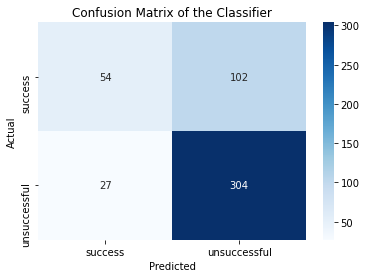

0.6323
('intercept', -4.15)
('MOBILE_NUMBER', 0.01)
('TASTES_AND_PREFERENCES', 0.38)
('PC_LOGINS', 0.22)
('EARLY_DELIVERIES', 0.06)
('REFRIGERATED_LOCKER', 0.48)
('MASTER_CLASSES_ATTENDED', 0.23)
('total_cancellations', 0.23)
('MOBILE_NUMBER_user', 0.82)
('number_of_names', 0.52)
('valid_email', 1.54)


In [48]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")

##### using seaborn #####

# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['success','unsuccessful'])

### AUC 
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

# the model's coefficients.
# zipping each feature name to its coefficient
logreg_model_values = zip(chef[candidate_dict['logit_sig']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

# Classification Trees (CART Models)

In [49]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                    y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                    y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8931
Full Tree Testing ACCURACY : 0.6612
Full Tree AUC Score: 0.6084


In [50]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 72
False Positives: 84
False Negatives: 81
True Positives : 250



In [51]:
# calling display_tree
display_tree(tree       = full_tree_fit,
             feature_df = x_train)

<ipython-input-23-8914a6291de9>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


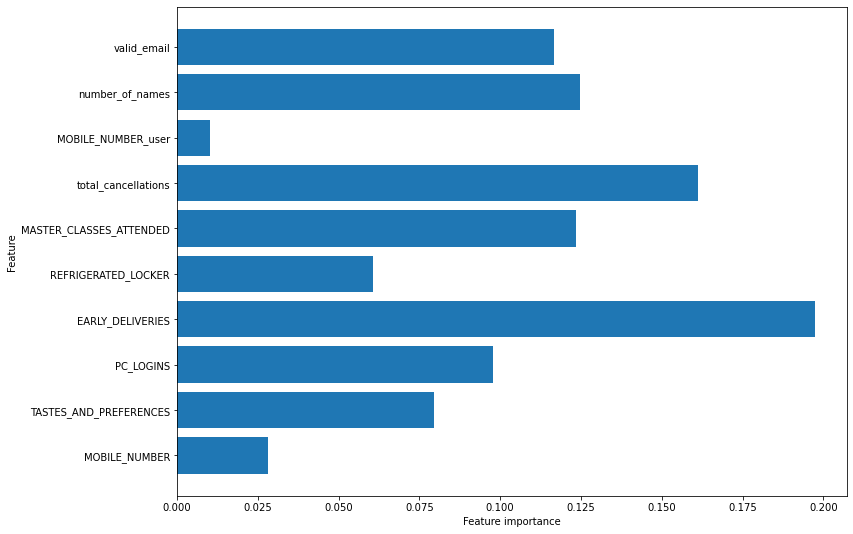

In [52]:
# plotting feature importance
plot_feature_importances(full_tree_fit,
                         train  = x_train,
                         export = False)

## prune the tree

In [53]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Pruned tree Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Pruned tree Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc


Pruned tree Training ACCURACY: 0.7395
Pruned tree Testing  ACCURACY: 0.7803
AUC Score        : 0.7248


In [54]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 89
False Positives: 67
False Negatives: 40
True Positives : 291



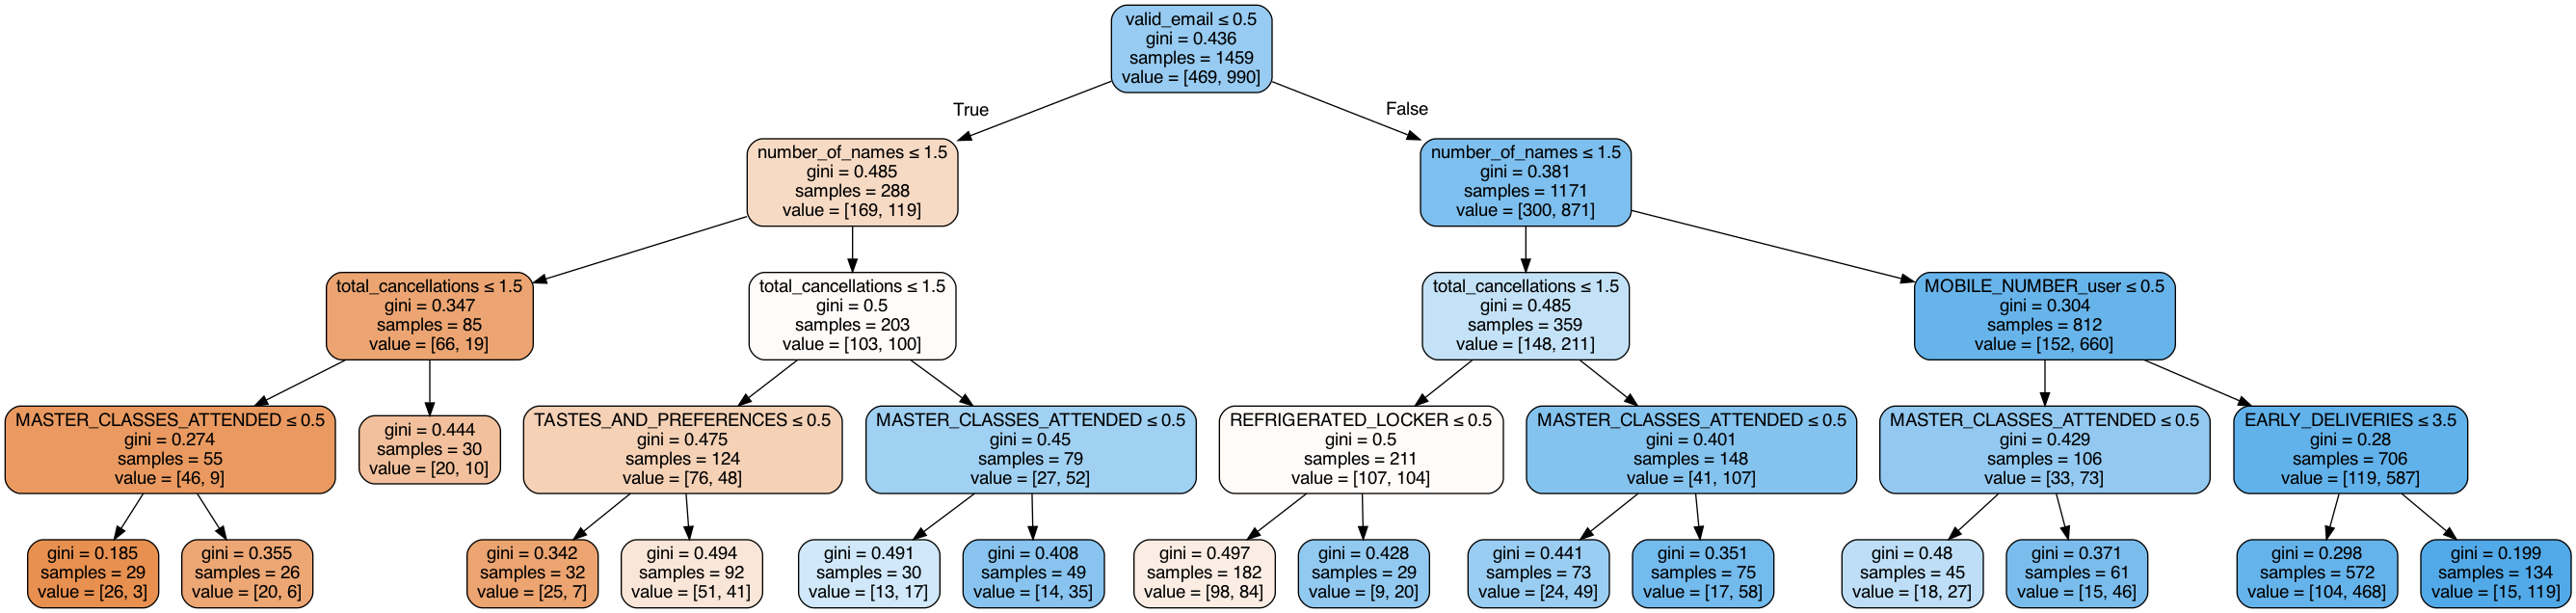

In [55]:
# calling display_tree
display_tree(tree       = pruned_tree_fit,
             feature_df = x_train)

<ipython-input-23-8914a6291de9>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


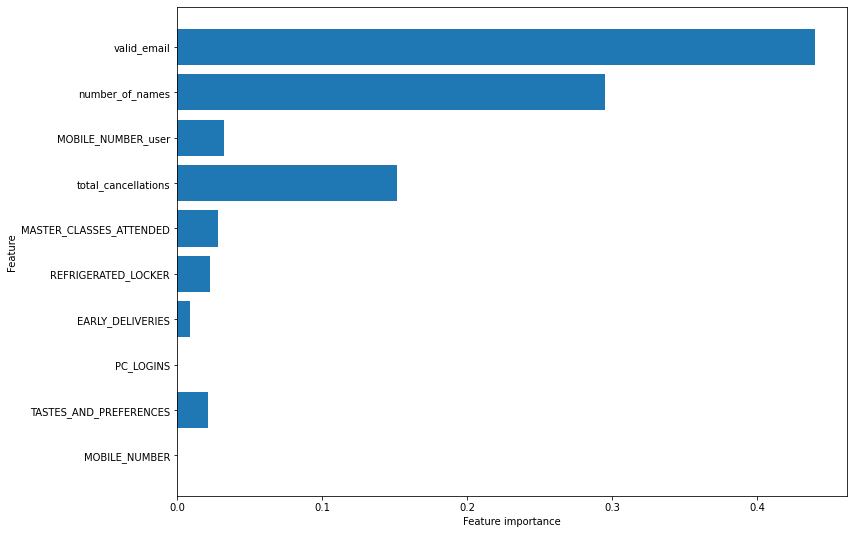

In [56]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train  = x_train,
                         export = False)

In [57]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./model_results/classification_model_performance.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6323         (54, 102, 27, 304)
Full Tree     0.6084         (72, 84, 81, 250)
Pruned Tree   0.7248         (89, 67, 40, 291)



# Hyperparameter Tuning

## Logistic Regression with Default Hyperparameters

In [59]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [60]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7341
Testing  ACCURACY: 0.7351
AUC Score        : 0.6323


## Hyperparameter Tuning with RandomizedSearchCV

In [62]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 5.0, 0.1)
warm_start_space = [True, False]
solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1200)


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

<ipython-input-62-a77c4232a17d>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  C_space          = pd.np.arange(0.1, 5.0, 0.1)


Tuned Parameters  : {'warm_start': False, 'solver': 'sag', 'C': 1.4000000000000001}
Tuned CV AUC      : 0.6339


In [63]:
####### best_estimator_ #######

# checking the best estimator for the model
lr_tuned_cv.best_estimator_

LogisticRegression(C=1.4000000000000001, max_iter=1200, random_state=219,
                   solver='sag')

In [65]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_

# FIT step is not needed

# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                  y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

Training ACCURACY: 0.7306
Testing  ACCURACY: 0.7351
AUC Score        : 0.6357


In [66]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 56
False Positives: 100
False Negatives: 29
True Positives : 302



In [67]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)

# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'             : 'Tuned LR',
                          'Training Accuracy'  : lr_train_acc,
                          'Testing Accuracy'   : lr_test_acc,
                          'AUC Score'          : lr_auc,
                          'Confusion Matrix'   : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy    Confusion Matrix
0     Logistic     0.6323             0.7341            0.7351  (54, 102, 27, 304)
1    Full Tree     0.6084             0.8931            0.6612   (72, 84, 81, 250)
2  Pruned Tree     0.7248             0.7395            0.7803   (89, 67, 40, 291)
3     Tuned LR     0.6357             0.7306            0.7351  (56, 100, 29, 302)

## Hyperparameter Tuning on Classification Trees

In [69]:
## Sample Solution for Homework ##

# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)

# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 250, # changed for the sake of time
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

<ipython-input-69-660ce4d6c97f>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(1, 25, 1)
<ipython-input-69-660ce4d6c97f>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 100, 1)


Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 66, 'max_depth': 3, 'criterion': 'gini'}
Tuned Training AUC: 0.6758


In [70]:
## Sample Solution for Homework ##

# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)

# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.732
Testing  ACCURACY: 0.77
AUC Score        : 0.7207


In [71]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 91
False Positives: 65
False Negatives: 47
True Positives : 284



In [72]:
## Sample Solution for Homework ##

# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)

# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy    Confusion Matrix
0     Logistic     0.6323             0.7341            0.7351  (54, 102, 27, 304)
1    Full Tree     0.6084             0.8931            0.6612   (72, 84, 81, 250)
2  Pruned Tree     0.7248             0.7395            0.7803   (89, 67, 40, 291)
3     Tuned LR     0.6357             0.7306            0.7351  (56, 100, 29, 302)
4   Tuned Tree     0.7207             0.7320            0.7700   (91, 65, 47, 284)

# Random Forest

In [75]:
# default values
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [74]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8931
Testing  ACCURACY: 0.7084
AUC Score        : 0.6262


<ipython-input-23-8914a6291de9>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


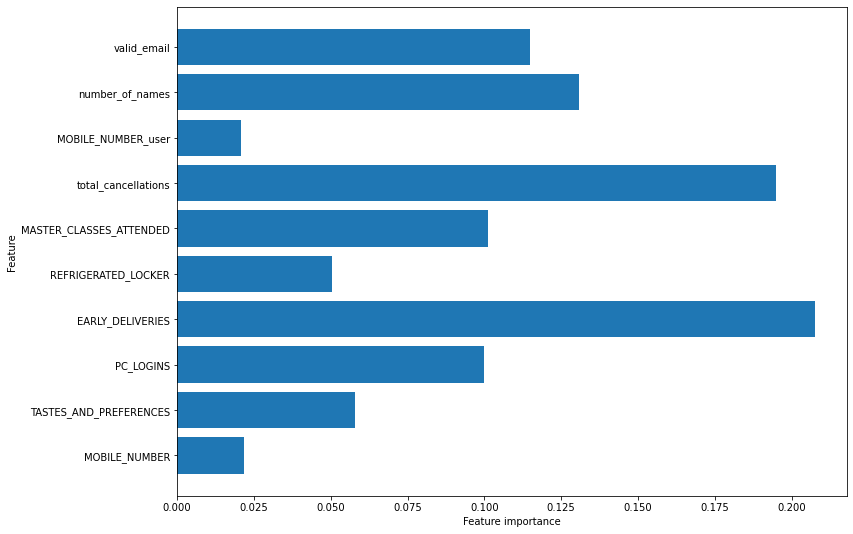

In [76]:
# plotting feature importances
plot_feature_importances(rf_default_fit ,
                         train  = x_train,
                         export = False)

In [79]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()

# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 62
False Positives: 94
False Negatives: 48
True Positives : 283



In [80]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy    Confusion Matrix
0              Logistic     0.6323             0.7341            0.7351  (54, 102, 27, 304)
1             Full Tree     0.6084             0.8931            0.6612   (72, 84, 81, 250)
2           Pruned Tree     0.7248             0.7395            0.7803   (89, 67, 40, 291)
3              Tuned LR     0.6357             0.7306            0.7351  (56, 100, 29, 302)
4            Tuned Tree     0.7207             0.7320            0.7700   (91, 65, 47, 284)
5  Random Forest (Full)     0.6262             0.8931            0.7084   (62, 94, 48, 283)

In [82]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 1100, 250)
leaf_space       = pd.np.arange(1, 31, 10)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 1000,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

<ipython-input-82-32f2e63c2a26>:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  estimator_space  = pd.np.arange(100, 1100, 250)
<ipython-input-82-32f2e63c2a26>:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space       = pd.np.arange(1, 31, 10)
/Users/jingshih/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 96 is smaller than n_iter=1000. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 600, 'min_samples_leaf': 11, 'criterion': 'entropy', 'bootstrap': False}
Tuned Training AUC: 0.6617


In [96]:
# building a model based on hyperparameter tuning results

# copy/pasting in the best_estimator_ results
# to avoid running another RandomizedSearch
forest_tuned = RandomForestClassifier(bootstrap=False,
                       criterion='entropy',
                       min_samples_leaf=11, n_estimators=600, random_state=219,
                       warm_start=True)
# FITTING the model object
forest_tuned_fit = forest_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)

# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.78
Forest Tuned Testing  ACCURACY: 0.7474
Forest Tuned AUC Score        : 0.6515


<ipython-input-23-8914a6291de9>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


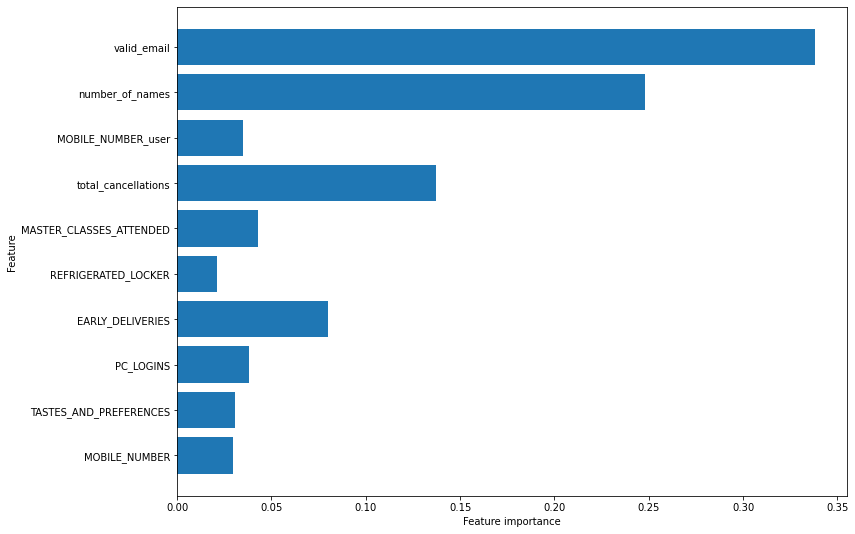

In [97]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [98]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()

# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 60
False Positives: 96
False Negatives: 27
True Positives : 304



In [89]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy    Confusion Matrix
0                    Logistic     0.6323             0.7341            0.7351  (54, 102, 27, 304)
1                   Full Tree     0.6084             0.8931            0.6612   (72, 84, 81, 250)
2                 Pruned Tree     0.7248             0.7395            0.7803   (89, 67, 40, 291)
3                    Tuned LR     0.6357             0.7306            0.7351  (56, 100, 29, 302)
4                  Tuned Tree     0.7207             0.7320            0.7700   (91, 65, 47, 284)
5        Random Forest (Full)     0.6262             0.8931            0.7084   (62, 94, 48, 283)
6  Tuned Random Forest (Full)     0.6515             0.7800            0.7474   (60, 96, 27, 304)

# Gradient Boosted Machines

In [90]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.7807
Testing ACCURACY : 0.7474
AUC Score        : 0.6651


In [91]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()



# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 68
False Positives: 88
False Negatives: 35
True Positives : 296



In [92]:
# SCORING the model
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy    Confusion Matrix
0                    Logistic     0.6323             0.7341            0.7351  (54, 102, 27, 304)
1                   Full Tree     0.6084             0.8931            0.6612   (72, 84, 81, 250)
2                 Pruned Tree     0.7248             0.7395            0.7803   (89, 67, 40, 291)
3                    Tuned LR     0.6357             0.7306            0.7351  (56, 100, 29, 302)
4                  Tuned Tree     0.7207             0.7320            0.7700   (91, 65, 47, 284)
5        Random Forest (Full)     0.6262             0.8931            0.7084   (62, 94, 48, 283)
6  Tuned Random Forest (Full)     0.6515             0.7800            0.7474   (60, 96, 27, 304)
7                  GBM (Full)     0.6651             0.7807            0.7474   (68, 88, 35, 296)

# Comparing results

In [94]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

Model Name  AUC Score  Training Accuracy  Testing Accuracy    Confusion Matrix
2                 Pruned Tree     0.7248             0.7395            0.7803   (89, 67, 40, 291)
4                  Tuned Tree     0.7207             0.7320            0.7700   (91, 65, 47, 284)
7                  GBM (Full)     0.6651             0.7807            0.7474   (68, 88, 35, 296)
6  Tuned Random Forest (Full)     0.6515             0.7800            0.7474   (60, 96, 27, 304)
3                    Tuned LR     0.6357             0.7306            0.7351  (56, 100, 29, 302)
0                    Logistic     0.6323             0.7341            0.7351  (54, 102, 27, 304)
5        Random Forest (Full)     0.6262             0.8931            0.7084   (62, 94, 48, 283)
1                   Full Tree     0.6084             0.8931            0.6612   (72, 84, 81, 250)

In [95]:
# saving the DataFrame to Excel
model_performance.to_excel('./model_results/classification_model_performance.xlsx',
                           index = False)